Validation Set

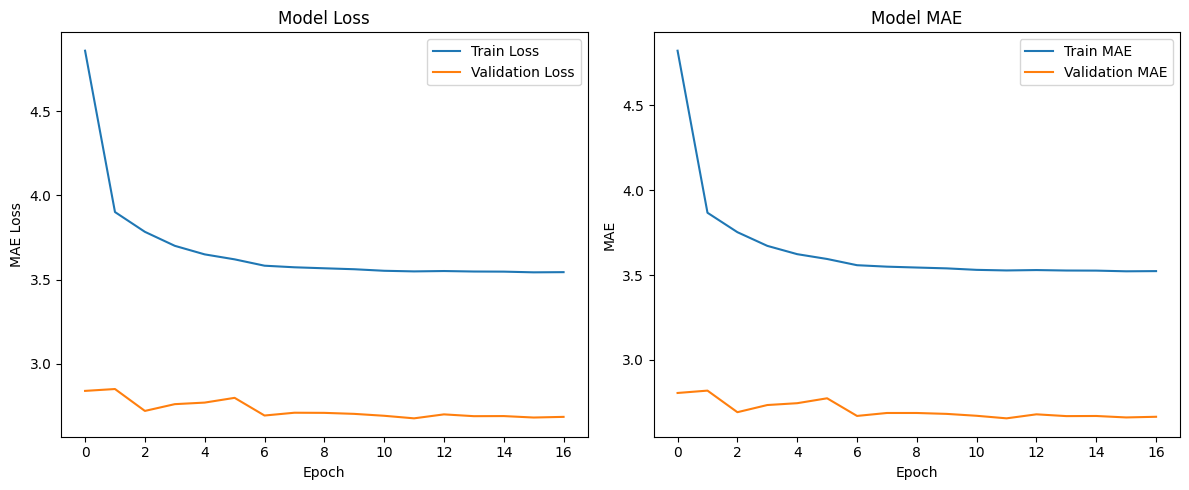

In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Load history from pickle
with open("../models/training_history.pkl", "rb") as f:
    history = pickle.load(f)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('MAE Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['mae'], label='Train MAE')
plt.plot(history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

Test Set

In [4]:
import pandas as pd
from tensorflow.keras.models import load_model

with open("../data/test_df.pkl", "rb") as f:
    test_df = pickle.load(f)

In [7]:
test_df.columns

Index(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI',
       'SO2_Mean_Imputed', 'CO_Mean_Imputed', 'year', 'month', 'day',
       'weekday', 'is_weekend', 'NO2_to_SO2', 'CO_to_SO2', 'O3_to_CO',
       'NO2 Mean_roll_3', 'O3 Mean_roll_3', 'SO2 Mean_roll_3',
       'CO Mean_roll_3'],
      dtype='object')

In [5]:
X_cols = [
    "NO2 Mean",
    "O3 Mean",
    "SO2 Mean",
    "CO Mean",
    'SO2_Mean_Imputed', 
    'CO_Mean_Imputed',
    "NO2_to_SO2",
    "CO_to_SO2",
    "O3_to_CO",
    'NO2 Mean_roll_3',
    'O3 Mean_roll_3',
    'SO2 Mean_roll_3',
    'CO Mean_roll_3',
    "year",
    "month",
    "is_weekend"
]

y_cols = ["NO2 AQI", "O3 AQI", "SO2 AQI", "CO AQI"]

# Prepare input and target
X_test = test_df[X_cols].values
y_test = test_df[y_cols].values

# Load the trained model
model = load_model("../models/best_aqi_model.keras")

# Predict
preds = model.predict(X_test)

# Evaluate
mae = np.mean(np.abs(preds - y_test), axis=0)
for i, col in enumerate(y_cols):
    print(f"MAE for {col}: {mae[i]:.2f}")

print(f"\nOverall MAE: {np.mean(mae):.2f}")

8188/8188 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step
MAE for NO2 AQI: 3.32
MAE for O3 AQI: 6.52
MAE for SO2 AQI: 1.06
MAE for CO AQI: 0.70

Overall MAE: 2.90


8188/8188 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step


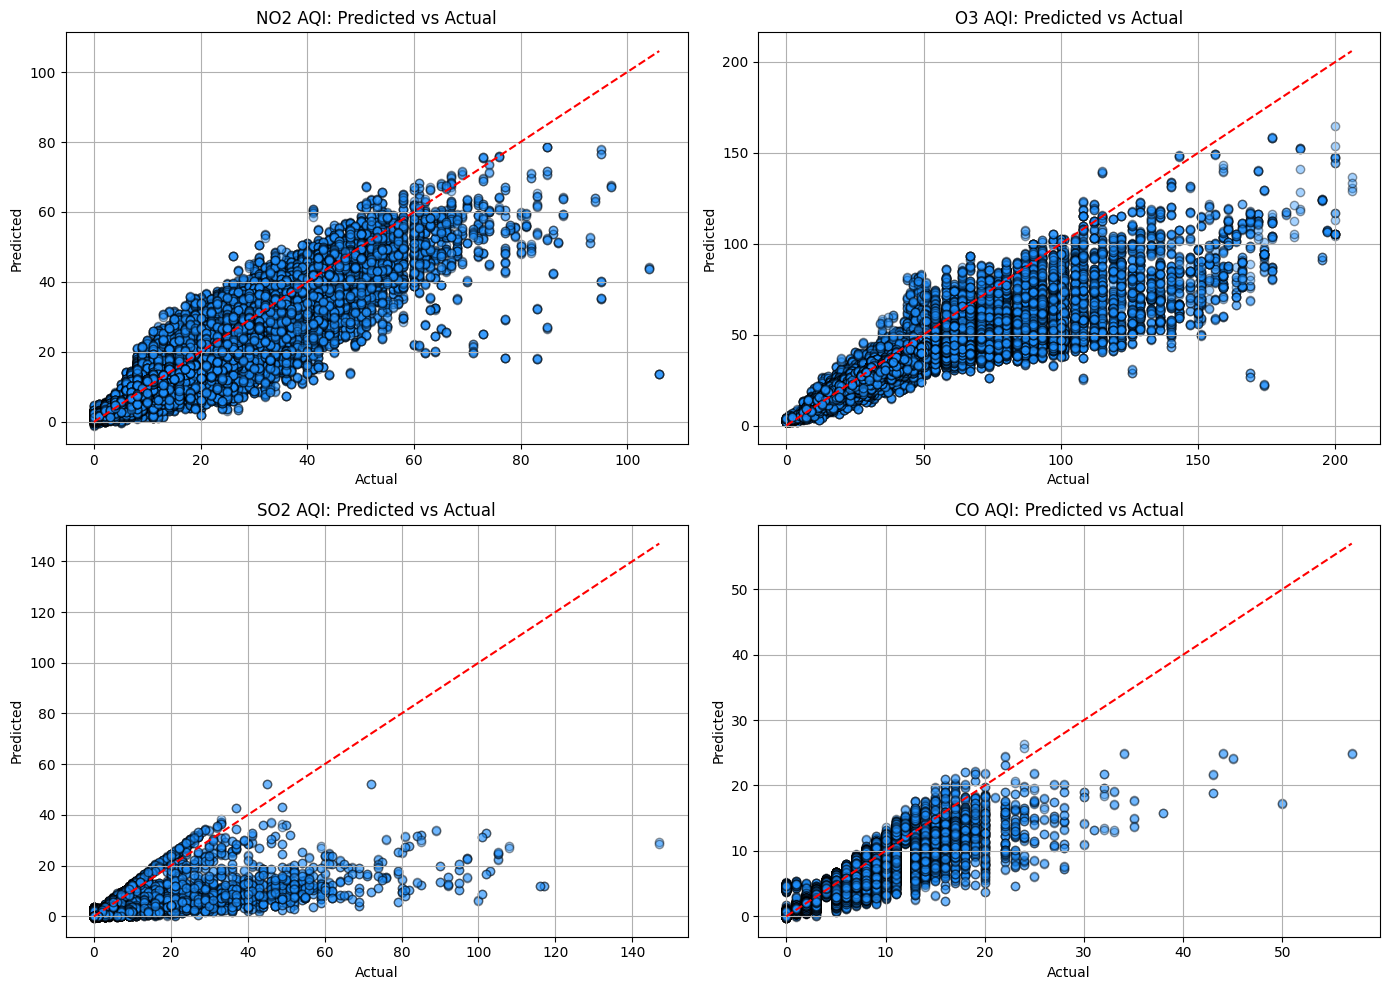

In [6]:
# True and predicted values
y_true = test_df[["NO2 AQI", "O3 AQI", "SO2 AQI", "CO AQI"]].values
y_pred = model.predict(X_test)

pollutants = ["NO2", "O3", "SO2", "CO"]
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.scatter(y_true[:, i], y_pred[:, i], alpha=0.4, color="dodgerblue", edgecolors="k")
    ax.plot([y_true[:, i].min(), y_true[:, i].max()],
            [y_true[:, i].min(), y_true[:, i].max()], 
            color="red", linestyle="--")
    ax.set_title(f"{pollutants[i]} AQI: Predicted vs Actual")
    ax.set_xlabel("Actual")
    ax.set_ylabel("Predicted")
    ax.grid(True)

plt.tight_layout()
plt.show()